In [1]:
# %cd ..
import inputs, simuls, analysis
results = analysis.GetResults(verbose=True)

# PenEasy SPC simulation

In [ ]:
pid = 'SPC'
# Initialize PenEasy Input Editor
peneasy_inps = inputs.PenEasy(verbose=True)

# Initialize Simulators (identified by pid)
peneasy_sims = simuls.PenEasy(verbose=True)
peneasy_sims.activate_pid('SPC')

In [ ]:
MATS = {'water' : ['water', 1, 1.00+00]}
SIZE = [10, 10, 10]
STEP = [0.4, 0.4, 0.4]  #cm
nhist = "1e6"

peneasy_inps.edit_voxSize(pid, SIZE, STEP)
peneasy_inps.edit_seed(pid, 12345, 54321)
peneasy_inps.edit_mat(pid, MATS, SIZE, STEP)
peneasy_inps.edit_source_nhist(pid, nhist)

In [ ]:
isotopes = ["N13", "O15", "F18", "Cu64", "Ga68", "Rb82", "I124"] #"C11", 

peneasy_inps.verbose = False
for iso in isotopes:
    print(f"Simulating {iso}")
    peneasy_inps.edit_isotope(pid, iso)
    peneasy_sims.simulate(pid, get_times=True, time_samples=1, output_dir="RESULTS/SPC-Study1-Water/PenEasy_xyz", final_file=f"{iso}")

# vGATE 9.x simulation

In [2]:
pid = '9'
# Initialize GATE Input Editor
gate_inps = inputs.GATE(verbose=True)

# Initialize Simulators (identified by pid)
gate_sims = simuls.GATE(verbose=True)
gate_sims.activate_pid(pid, output_format='dat')

GATE 9 activated


In [8]:
nhist = "1e6"

gate_inps.edit_seed(pid, 12345, 54321)
gate_inps.edit_source_nhist(pid, nhist)

In [33]:
isotopes = ["C11", "F18", "Ga68"] 
MATS = {
    # SIZE     STEP (cm)   material   mat_name   mat_id  density (g/cm3)
    ((20,)*3, (0.3,)*3 ) : {'lung' : ['LungICRP', 2,     0.30+00]},
    ((20,)*3, (0.07,)*3) : {'bone' : ['BoneB100', 12,    1.45+00]}
        }

gate_inps.verbose = False
for STEPnSIZE, MAT in MATS.items():
    material = list(MAT.keys())[0]
    if material == 'lung':
        continue
    print(f"****SIMULATING {material}****")

    SIZE, STEP = STEPnSIZE
    gate_inps.edit_voxSize(pid, SIZE, STEP)
    gate_inps.edit_mat(pid, MAT, SIZE, STEP)

    res_folder = f"RESULTS/SPC/{material.capitalize()}/GATE93_xyz"
    for iso in isotopes:
        print(f"--Simulating {iso}")
        gate_inps.edit_isotope(pid, iso)
        gate_sims.simulate(pid, get_times=True, time_samples=1, output_dir=res_folder, final_file=f"{iso}")


****SIMULATING bone****
--Simulating C11
GATE 9 real time: 246.229 +- 0.000 s
--Simulating F18
GATE 9 real time: 195.507 +- 0.000 s
--Simulating Ga68
GATE 9 real time: 276.154 +- 0.000 s


In [34]:
import numpy as np

for STEPnSIZE, MAT in MATS.items():
    material = list(MAT.keys())[0]
    if material == 'lung':
        continue
    res_folder = f"RESULTS/SPC/{material.capitalize()}/GATE93_xyz"
    times_file = res_folder + "/" + pid + "_times.txt"
    times = np.loadtxt(times_file).astype("str")
    times[:,1], times[:,0] = times[:,0], isotopes
    np.savetxt(times_file, times, fmt='%s')

# Results analysis

In [ ]:
iso = "C11"

folder = f"RESULTS/SPC/Bone/PHITS_xyz"
analysis.filter_rmax(f"{folder}/{iso}")

In [35]:
import matplotlib.pyplot as plt
import numpy as np

histo_bins = 201
histo_step = .01 #cm
isotopes = ["C11", "F18", "Ga68"] 

results.active_results.clear()
for iso in isotopes:
    of = f"RESULTS/SPC/Bone/GATE93_xyz/{iso}.dat"
    results.load(f"GATEv9.3 {iso}", of, [histo_bins]*3, [histo_step]*3)

# for iso in isotopes:
#     of = f"RESULTS/SPC-Study1-Water/PHITS_xyz/{iso}.dat"
#     results.load(f"PHITS {iso}", of, [histo_bins]*3, [histo_step]*3)

#     of = f"RESULTS/SPC-Study1-Water/PenEasy_xyz/{iso}.dat"
#     results.load(f"PenEasy {iso}", of, [histo_bins]*3, [histo_step]*3)

#     if iso in lowPRlabels:
#         lowPRlabels[iso].append(f"PHITS {iso}")
#         lowPRlabels[iso].append(f"PenEasy {iso}")
#     elif iso in highPRlabels:
#         highPRlabels[iso].append(f"PHITS {iso}")
#         highPRlabels[iso].append(f"PenEasy {iso}")

# for iso in ["C11", "O15", "F18"]:
#     of = f"RESULTS/SPC-Study1-Water/GATE7_xyz/{iso}.dat"
#     results.load(f"GATE7 {iso}", of, [histo_bins]*3, [histo_step]*3)

#     if iso in lowPRlabels:
#         lowPRlabels[iso].append(f"GATE7 {iso}")
#     elif iso in highPRlabels:
#         highPRlabels[iso].append(f"GATE7 {iso}")


GATEv9.3 C11 loaded
GATEv9.3 F18 loaded
GATEv9.3 Ga68 loaded


In [36]:
results.data_analysis()

Size of annihilations sample:
     GATEv9.3 C11       1000477
     GATEv9.3 F18       1000337
     GATEv9.3 Ga68      1001007
Number of annihilation point coords:
     GATEv9.3 C11       1000477
     GATEv9.3 F18       1000337
     GATEv9.3 Ga68      1001007
Maximum radial distance traveled simulated:
     GATEv9.3 C11          2.84 mm
     GATEv9.3 F18          1.54 mm
     GATEv9.3 Ga68         6.49 mm
Average radial distance traveled simulated:
     GATEv9.3 C11          0.55 mm
     GATEv9.3 F18          0.28 mm
     GATEv9.3 Ga68         1.61 mm
Cummulative distances:
     GATEv9.3 C11    50% @ 0.37mm	90% @ 1.11mm
     GATEv9.3 F18    50% @ 0.14mm	90% @ 0.55mm
     GATEv9.3 Ga68   50% @ 1.36mm	90% @ 3.03mm


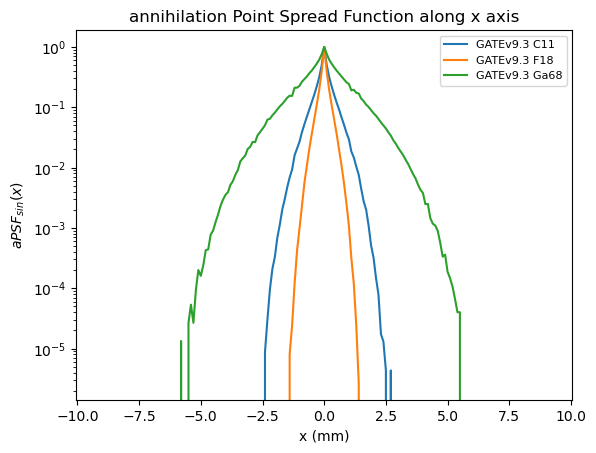

In [37]:
results.plot_aPSFx(sin=True, log_scale=True, lim=histo_bins*histo_step/2*10, legend_size=8)
plt.show()

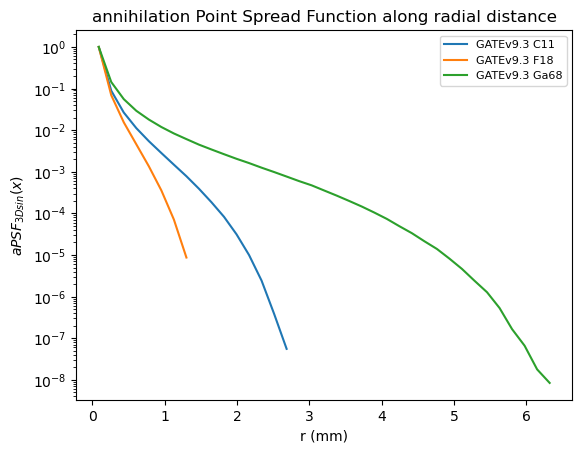

In [38]:
results.plot_aPSF3D(sin=True, log_scale=True, legend_size=8)
plt.show()

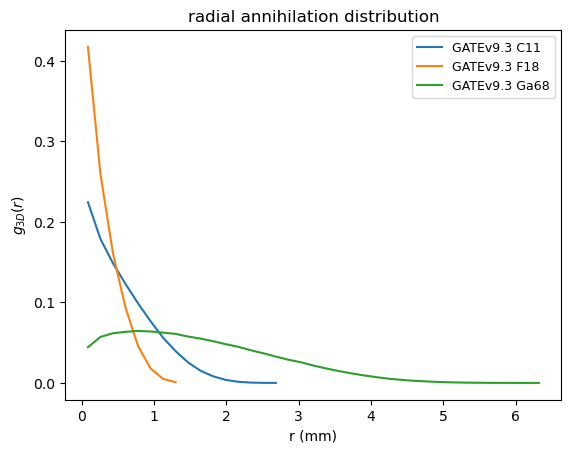

In [39]:
results.plot_g3D(log_scale=False)

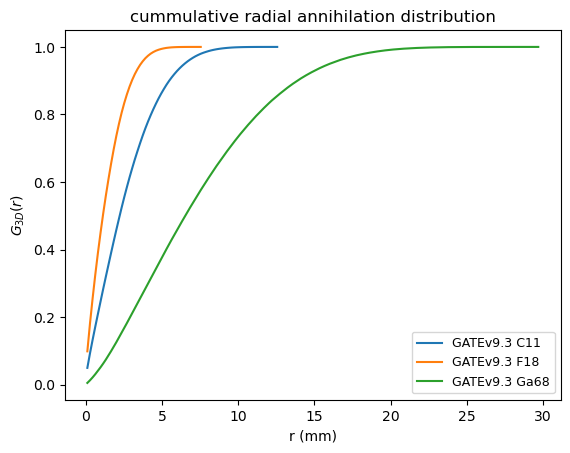

In [32]:
results.plot_G3D()